# Neural Networks and Random Forest

### Importing the data

In [1]:
import pandas as pd
train = pd.read_csv('data/train.csv', index_col=None)
test_df = pd.read_csv('data/test.csv')
test, Id = test_df.iloc[:,1:], test_df['TestId']

### Making the pipeline 

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

scaler = StandardScaler()
anova_filter = SelectKBest(f_regression)
imputer = Imputer(strategy='mean', missing_values="NaN")
clf = RandomForestClassifier()

pipeline_rf = Pipeline([
    ('imp', imputer),
    ('anova', anova_filter),
    ('rf', clf)
])

clf = MLPClassifier()
pipeline_mlp = Pipeline([
        ('imp', imputer),
        ('scale', scaler), 
        ('anova', anova_filter), 
        ('mlp', clf)
])

C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### GridScoring

In [4]:
pipeline_dict = {'rf': pipeline_rf, 'mlp': pipeline_mlp} 
parameter_grid_dict = {}
parameter_grid_dict['rf'] = {
            'anova__k': [8, 9],
            'rf__n_estimators': [100, 1000],
            'rf__max_depth': [5., None],
            'rf__max_features' : [0.5, 1]
        }

parameter_grid_dict['mlp'] = {
            'anova__k': [6, 9],
            'mlp__batch_size': [10, 100, 1000],
            'mlp__hidden_layer_sizes': [(100, 100, 100), (10, 20, 100)],
            'mlp__solver' : ['adam', 'sgd', 'lbfgs']
        }
grid_results = {}
for alg in ['rf', 'mlp']:
    pipeline = pipeline_dict[alg]
    parameter_grid = parameter_grid_dict[alg]    
    grid_search = GridSearchCV(pipeline, parameter_grid, cv=5, verbose=3)
    grid_search.fit(train.iloc[:,1:], train['Class'])

    sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)
    print(grid_search.best_score_)
    print(grid_search.best_params_)
    
    grid_results[alg] = grid_search

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.791045 -   0.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.835821 -   0.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.860000 -   0.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.869347 -   0.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.758794 -   0.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.805970 -   1.8s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.835821 -   1.5s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.860000 -   1.4s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.869347 -   1.1s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.758794 -   1.4s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.805970 -   0.1s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.835821 -   0.1s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.870000 -   0.1s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.869347 -   0.1s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.763819 -   0.0s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.805970 -   1.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.835821 -   1.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.870000 -   1.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.869347 -   1.2s
[CV] anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.763819 -   1.3s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.805970 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.835821 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.860000 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.874372 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.768844 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.791045 -   1.3s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.835821 -   1.2s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.860000 -   1.2s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.874372 -   1.4s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.758794 -   1.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.805970 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.835821 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.860000 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.874372 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.758794 -   0.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.791045 -   1.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.820896 -   1.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.860000 -   1.1s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.874372 -   1.2s
[CV] anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=8, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.758794 -   1.2s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.805970 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.840796 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.870000 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.874372 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=100, score=0.783920 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.805970 -   1.2s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.840796 -   1.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.865000 -   1.2s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.874372 -   1.3s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=0.5, rf__n_estimators=1000, score=0.783920 -   1.2s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.805970 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.835821 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.855000 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.874372 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=100, score=0.783920 -   0.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.805970 -   1.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.835821 -   1.4s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.855000 -   1.2s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.874372 -   1.1s
[CV] anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=5.0, rf__max_features=1, rf__n_estimators=1000, score=0.783920 -   1.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.791045 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.820896 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.860000 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.874372 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=100, score=0.778894 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.791045 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.835821 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.860000 -   1.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.879397 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=0.5, rf__n_estimators=1000, score=0.783920 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.791045 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.820896 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.860000 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.879397 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100 
[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=100, score=0.783920 -   0.1s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.791045 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.835821 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.860000 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.879397 -   1.2s
[CV] anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, rf__max_depth=None, rf__max_features=1, rf__n_estimators=1000, score=0.783920 -   1.2s
0.835
{'anova__k': 9, 'rf__max_depth': 5.0, 'rf__max_features': 0.5, 'rf__n_estimators': 100}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.796020 -   1.2s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.820896 -   0.9s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.835000 -   0.9s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.869347 -   1.0s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.763819 -   0.7s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.796020 -   2.6s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.825871 -   1.4s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.835000 -   2.1s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.864322 -   2.1s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.758794 -   1.2s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.791045 -   0.4s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.820896 -   0.4s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.835000 -   0.5s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.869347 -   0.4s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.763819 -   0.8s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.791045 -   0.8s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.820896 -   1.0s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.825000 -   0.4s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.864322 -   0.6s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.753769 -   0.7s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.796020 -   0.9s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.820896 -   1.2s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.815000 -   2.3s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.859296 -   1.1s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.773869 -   0.7s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.796020 -   0.3s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.820896 -   0.3s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.835000 -   0.2s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.869347 -   0.3s
[CV] anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.783920 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.810945 -   0.3s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.835821 -   0.3s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.835000 -   0.2s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.869347 -   0.2s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 
[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.778894 -   0.1s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.791045 -   1.1s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.820896 -   1.0s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.835000 -   0.9s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.864322 -   0.7s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.758794 -   0.7s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.796020 -   0.7s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.820896 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.825000 -   0.5s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.864322 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.768844 -   0.8s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.800995 -   0.2s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.820896 -   0.5s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.825000 -   0.2s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 
[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.854271 -   0.1s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.758794 -   0.1s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 
[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.796020 -   1.0s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.840796 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.860000 -   1.0s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 
[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.869347 -   0.2s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.753769 -   0.5s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.805970 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.820896 -   0.3s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.835000 -   0.4s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.869347 -   0.3s
[CV] anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.758794 -   0.3s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.796020 -   0.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.825871 -   0.1s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.835000 -   0.4s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.864322 -   0.1s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.758794 -   0.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
C:\Users\Amy2403\Anaconda\lib\site-packages\sk

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.776119 -   1.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.825871 -   1.1s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.780000 -   1.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.834171 -   1.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.758794 -   1.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 
[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.796020 -   0.8s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.820896 -   0.4s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.835000 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.864322 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.768844 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.791045 -   0.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.825871 -   0.3s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.835000 -   0.3s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.864322 -   0.4s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.753769 -   0.3s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
C:\Users\Amy2403\Anaconda\lib\site-packages\sk

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.761194 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.800995 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.770000 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.809045 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.753769 -   0.5s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 
[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.810945 -   0.3s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.820896 -   0.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.825000 -   0.2s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.864322 -   0.4s
[CV] anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=6, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.783920 -   0.4s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.805970 -   0.9s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.825871 -   0.8s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.865000 -   0.7s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.879397 -   1.0s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.778894 -   0.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.796020 -   2.0s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.815920 -   3.6s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.865000 -   3.1s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.874372 -   2.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.778894 -   2.1s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.800995 -   0.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.835821 -   0.9s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.865000 -   0.9s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.869347 -   1.1s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.778894 -   0.7s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.800995 -   0.9s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.820896 -   1.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.870000 -   0.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.869347 -   0.8s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.783920 -   1.0s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.796020 -   1.9s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.830846 -   2.7s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.875000 -   1.7s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.869347 -   1.7s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.798995 -   0.8s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.800995 -   0.3s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.820896 -   0.5s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.860000 -   0.4s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.864322 -   0.3s
[CV] anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=10, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.778894 -   0.5s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.791045 -   0.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.820896 -   0.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.865000 -   0.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.854271 -   0.1s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.768844 -   0.2s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.796020 -   1.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.825871 -   1.2s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.870000 -   1.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.869347 -   0.8s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.798995 -   0.9s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.791045 -   0.7s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.815920 -   0.7s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.855000 -   0.5s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.864322 -   0.6s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.778894 -   0.7s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.796020 -   0.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.815920 -   0.5s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.860000 -   0.3s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.854271 -   0.1s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.798995 -   0.2s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.791045 -   0.8s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.815920 -   1.0s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 
[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.870000 -   0.5s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.859296 -   0.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.778894 -   0.5s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.791045 -   0.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.810945 -   0.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.855000 -   0.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.864322 -   0.4s
[CV] anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=100, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.763819 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.796020 -   0.2s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.825871 -   0.1s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.875000 -   0.1s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.864322 -   0.6s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=adam, score=0.783920 -   0.5s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
C:\Users\Amy2403\Anaconda\lib\site-packages\sk

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.815920 -   1.2s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.805970 -   1.2s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.835000 -   1.1s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.859296 -   1.2s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=sgd, score=0.773869 -   1.1s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 
[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.805970 -   0.6s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.810945 -   0.9s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.865000 -   0.5s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.869347 -   0.7s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(100, 100, 100), mlp__solver=lbfgs, score=0.773869 -   0.6s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.796020 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.830846 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.870000 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.869347 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=adam, score=0.783920 -   0.5s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
C:\Users\Amy2403\Anaconda\lib\site-packages\sk

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.805970 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.761194 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.760000 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Amy2403\Anaconda\lib\site-packages\skle

[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.778894 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=sgd, score=0.758794 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 
[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.805970 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.830846 -   0.3s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.860000 -   0.3s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.869347 -   0.4s
[CV] anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs 


C:\Users\Amy2403\Anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Amy2403\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV]  anova__k=9, mlp__batch_size=1000, mlp__hidden_layer_sizes=(10, 20, 100), mlp__solver=lbfgs, score=0.788945 -   0.3s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.4min finished


0.834
{'anova__k': 9, 'mlp__batch_size': 10, 'mlp__hidden_layer_sizes': (10, 20, 100), 'mlp__solver': 'sgd'}


In [5]:
for alg in grid_results:
    grid_search = grid_results[alg]
    sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)
    print ('Best accuracy for %s :' % alg)
    print(grid_search.best_score_)
    print(grid_search.best_params_)

Best accuracy for rf :
0.835
{'anova__k': 9, 'rf__max_depth': 5.0, 'rf__max_features': 0.5, 'rf__n_estimators': 100}
Best accuracy for mlp :
0.834
{'anova__k': 9, 'mlp__batch_size': 10, 'mlp__hidden_layer_sizes': (10, 20, 100), 'mlp__solver': 'sgd'}


### Fitting  and testing the NN model

In [11]:
anova_mlp = Pipeline([('anova', anova_filter), ('mlp', clf)])
anova_mlp.set_params(anova__k=9, mlp__batch_size = 100, 
                     mlp__hidden_layer_sizes = (100, 100, 100), 
                     mlp__solver = 'sgd').fit(train.iloc[:,1:], train['Class'])
output = anova_mlp.predict_proba(test)

### Fitting and testing the RF model

In [6]:
clf = RandomForestClassifier()
anova_rf = Pipeline([('anova', anova_filter), ('rf', clf)])
anova_rf.set_params(anova__k=9, rf__max_depth = 5.0, rf__max_features = 0.5, 
                     rf__n_estimators = 100).fit(train.iloc[:,1:], train['Class'])
output = anova_rf.predict_proba(test)

### Saving to file 

In [7]:
submission = pd.DataFrame(Id)
submission = submission.join(pd.DataFrame({'PredictedScore':output[:,1]}))
#submission = pd.DataFrame(np.column_stack((Id ,output[:,1])), columns=['TestId', 'PredictedScore'])
submission.to_csv('data/submission.csv', index=False)

Prediction accuracy: 0.84
Area under ROC curve (AUC): 0.8573653333333332


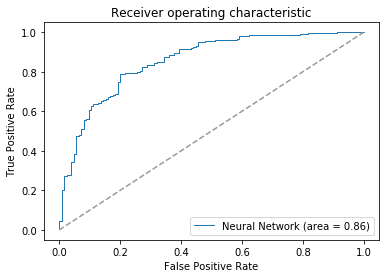

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold as SKFold

from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'relu', batch_size = 100, hidden_layer_sizes = (100, 100, 100), solver = 'adam', alpha = 0.0001, random_state = 1)   
nn_model = nn_model.fit(x_train, y_train)

x_train = train.iloc[:500,1:]
y_train = train['Class']
y_train = y_train[0:500]

x_test = train.iloc[500:,1:]
y_test = train['Class']
y_test = y_test[500:]

nn_pred = nn_model.predict(x_test)
nn_prob = nn_model.predict_proba(x_test)

random_seed = 1234
scv = SKFold(y=train['Class'], n_folds=5, random_state=random_seed)

mean_acc = 0.0
mean_auc = 0.0
all_tpr = []
all_acc = []
all_auc = []

acc = np.sum(y_test == nn_pred)*1./len(y_test)
print('Prediction accuracy:', acc)
fpr, tpr, thresholds = roc_curve(y_test, nn_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Area under ROC curve (AUC):', roc_auc)
plt.plot(fpr, tpr, lw=1, label = 'Neural Network (area = %0.2f)' % ( roc_auc))
all_acc.append(acc)
all_acc.append(roc_auc)


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))#, label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
